<div class='bar_title'></div>

*Data Driven Decisions in Practice (D3IP): Urban Analytics*

# Case Study: Predicting AirBnB Accomodation Prices

Gunther Gust & Nikolai Stein

Data Driven Decisions (D3) Group <br>
Center for Artificial Intelligence & Data Science <br>



<img src="images/d3.png" style="width:20%; float:left;" />

<img src="images/CAIDASlogo.png" style="width:20%; float:left;" />

Complete the case study outlined by the steps below. Remember to always comment your code and document your findings so that your notebook is easy to read and follow! (Apart from correctness, the style of the notebook will also affect your grade!)



# PART 1: Data Loading and Exploratory Data Analysis

Insructions:

* Load the `airbnb.geojson` file into this notebook as a geodataframe
* Explore the content of each column of the geodataframe using methods of your choice (descriptive statistics, plots etc.). Describe your findings in the markdown cells.
* Create a plot that displays the location of the airbnb listings and the price. Add a basemap of San Diego to the plot.

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd

import matplotlib.pyplot as plt 
import seaborn as sns
import contextily as cx

In [2]:
# Load the geodataframe <insert your code here>.... 
import geopandas as gpd
gdf = gpd.read_file('airbnb_listings.geojson')
print(gdf.head())

   accommodates  bathrooms  bedrooms  beds  rt_Private_room  rt_Shared_room  \
0             5        2.0       2.0   2.0                0               0   
1             6        1.0       2.0   4.0                0               0   
2             2        1.0       1.0   1.0                1               0   
3             2        1.0       1.0   1.0                1               0   
4             2        1.0       1.0   1.0                1               0   

   pg_Condominium  pg_House  pg_Other  pg_Townhouse  price  \
0               0         1         0             0  425.0   
1               1         0         0             0  205.0   
2               0         0         0             0   99.0   
3               0         1         0             0   72.0   
4               0         1         0             0   55.0   

                      geometry  
0  POINT (-117.12971 32.75399)  
1  POINT (-117.25253 32.78421)  
2  POINT (-117.14121 32.75327)  
3  POINT (-117.15269

These are the variables you should analyze and later use to predict the `price`:

In [3]:

variable_names = [
    "accommodates",  # Number of people it accommodates
    "bathrooms",  # Number of bathrooms
    "bedrooms",  # Number of bedrooms
    "beds",  # Number of beds
    # Below are binary variables, 1 True, 0 False
    "rt_Private_room",  # Room type: private room
    "rt_Shared_room",  # Room type: shared room
    "pg_Condominium",  # Property group: condo
    "pg_House",  # Property group: house
    "pg_Other",  # Property group: other
    "pg_Townhouse",  # Property group: townhouse
]

# PART 2 Feature Engineering: Get points-of-interest (POIs) and prepare them

Instructions:

* Use the method `features_from_address()` of osmnx to download POIs of the type `amenity` (select the types of amenities to include from this list here: https://wiki.openstreetmap.org/wiki/Key:amenity)
* Pay attention to set the `dist` parameter to an appropiate value 

In [4]:
import osmnx as ox

In [5]:
# Download the POI data <your code here> ...

def download_pois(address, distance, amenities):
    gdf = ox.features_from_address(address=address, dist=distance, tags={'amenity': amenities})
    return gdf


address = "San Diego, California, USA"
distance = 5000 
# amenities = ['restaurant', 'cafe']
amenities = ['restaurant']
pois = download_pois(address, distance, amenities)

print(pois.head())

                        addr:city addr:housenumber addr:postcode addr:state  \
element_type osmid                                                            
node         286316702  San Diego              721         92101         CA   
             297819169  San Diego              222         92101         CA   
             339168755        NaN              NaN           NaN        NaN   
             353135501        NaN              NaN           NaN        NaN   
             353135502        NaN              NaN           NaN        NaN   

                          addr:street     amenity            name  \
element_type osmid                                                  
node         286316702     9th Avenue  restaurant  Wicked Chicken   
             297819169  Island Avenue  restaurant        Cafe 222   
             339168755            NaN  restaurant         Barbusa   
             353135501            NaN  restaurant    The Wits End   
             353135502          

In [6]:
pois.head()

addr:city addr:housenumber addr:postcode addr:state  \
element_type osmid                                                            
node         286316702  San Diego              721         92101         CA   
             297819169  San Diego              222         92101         CA   
             339168755        NaN              NaN           NaN        NaN   
             353135501        NaN              NaN           NaN        NaN   
             353135502        NaN              NaN           NaN        NaN   

                          addr:street     amenity            name  \
element_type osmid                                                  
node         286316702     9th Avenue  restaurant  Wicked Chicken   
             297819169  Island Avenue  restaurant        Cafe 222   
             339168755            NaN  restaurant         Barbusa   
             353135501            NaN  restaurant    The Wits End   
             353135502            NaN  restaurant  The Thai Grill   

                                           geometry changing_table  \
element_type osmid                                                   
node         286316702  POINT (-117.15631 32.71273)            NaN   
             297819169  POINT (-117.16267 32.71056)            yes   
             339168755  POINT (-117.16850 32.72478)            NaN   
             353135501  POINT (-117.16126 32.74724)            NaN   
             353135502  POINT (-117.16118 32.74724)            NaN   

                                   cuisine  ... ref:nrhp source_ref  \
element_type osmid                          ...                       
node         286316702                 NaN  ...      NaN        NaN   
             297819169  breakfast;sandwich  ...      NaN        NaN   
             339168755             italian  ...      NaN        NaN   
             353135501                 NaN  ...      NaN        NaN   
             353135502                 NaN  ...      NaN        NaN   

                       start_date toilets:wheelchair layer fast_food access  \
element_type osmid                                                            
node         286316702        NaN                NaN   NaN       NaN    NaN   
             297819169        NaN                NaN   NaN       NaN    NaN   
             339168755        NaN                NaN   NaN       NaN    NaN   
             353135501        NaN                NaN   NaN       NaN    NaN   
             353135502        NaN                NaN   NaN       NaN    NaN   

                       craft official_name short_name  
element_type osmid                                     
node         286316702   NaN           NaN        NaN  
             297819169   NaN           NaN        NaN  
             339168755   NaN           NaN        NaN  
             353135501   NaN           NaN        NaN  
             353135502   NaN           NaN        NaN  

[5 rows x 115 columns]

Data cleaning: The resulting `pois` geodataframe may have a composite row index. In addition, some POIs may be of a strange element_type. You can use the following code to eliminate these issues.

In [7]:
# Clean the POI data
pois.reset_index(inplace=True) # reset the index of the data frame
pois = pois[pois.element_type=="node"] # eliminate all POIs that are not of the type "node"
pois.head() # check the results

,element_type,osmid,addr:city,addr:housenumber,addr:postcode,addr:state,addr:street,amenity,name,geometry,...,ref:nrhp,source_ref,start_date,toilets:wheelchair,layer,fast_food,access,craft,official_name,short_name
0,node,286316702,San Diego,721,92101,CA,9th Avenue,restaurant,Wicked Chicken,POINT (-117.15631 32.71273),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,node,297819169,San Diego,222,92101,CA,Island Avenue,restaurant,Cafe 222,POINT (-117.16267 32.71056),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,node,339168755,NaN,NaN,NaN,NaN,NaN,restaurant,Barbusa,POINT (-117.16850 32.72478),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,node,353135501,NaN,NaN,NaN,NaN,NaN,restaurant,The Wits End,POINT (-117.16126 32.74724),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,node,353135502,NaN,NaN,NaN,NaN,NaN,restaurant,The Thai Grill,POINT (-117.16118 32.74724),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Instructions:
* Plot the POIs spatially (use again a background map of San Diego)
* When you use POIs of different amenity types, color the POIs differently

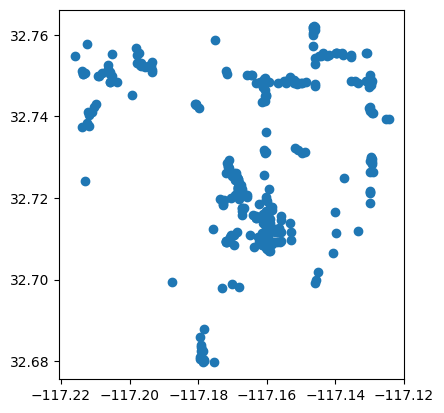

In [8]:
# <Your code here>
pois.plot()
airbnb = pois

For each POI amenity type, create a kernel density estimation (KDE):
* Convert the `geometry` of the POI into a suitable coordinate data format (you may use the provided function `create_coordinate_array` for this)
* Feed the resulting coordinates into the `gaussian_kde` function and estimate the function
* Also convert the `geometry` of the Airbnb listings into the coordinate data format (you may use the provided function `create_coordinate_array` for this)
* Using the converted Airbnb geometries, compute the KDE for the locations of the Airbnb listings
* Add the KDE estimate as additional columns to your original airbnb geodataframe

In [9]:
from scipy.stats import gaussian_kde

In [10]:
# helper function to convert the geometries into a suitable coordinate format for the KDE
def create_coordinate_array(geometries): 
    x_values = []
    y_values = []

# Iterate through each row in the GeoDataFrame
    for multipoint in geometries:
        # Ensure the geometry is indeed MultiPoint; if it's just a single Point, wrap it in a list
        points = list(multipoint.geoms) if hasattr(multipoint, "geoms") else [multipoint]
        
        # For each Point in the MultiPoint, extract x and y values
        for point in points:
            x_values.append(point.x)
            y_values.append(point.y)

    # Optionally, convert the lists to numpy arrays for further processing
    x_values = np.array(x_values)
    y_values = np.array(y_values)

    # Rearrange data to create a 2D array of x and y coordinates
    xy = np.vstack([x_values,y_values])

    return xy


# Example Usage for the Airbnb geodataframe
airbnb_array = create_coordinate_array(airbnb.geometry)

In [11]:

# Compute the density estimation
kde = gaussian_kde(airbnb_array)
x_values = airbnb_array[0,:]
y_values = airbnb_array[1,:]

# Define the grid points where you want to calculate the density
xmin, xmax = x_values.min(), x_values.max()
ymin, ymax = y_values.min(), y_values.max()
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j] #generate 100 evenly spaced points between min and max

# Evaluate the density at grid points
density = kde(np.vstack([xx.ravel(), yy.ravel()]))
density = density.reshape(xx.shape) # reshape to the original shape of xx (for plotting)



Create a spatial point plot(s) of the Airbnb listings and color the points according to the KDE estimates, in order to check your results.

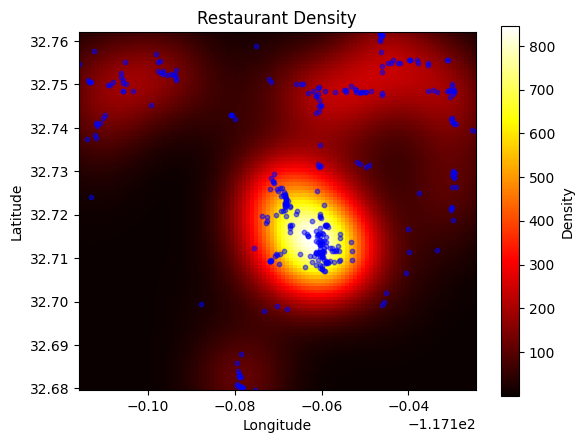

In [12]:
plt.imshow(np.rot90(density), cmap='hot', extent=[xmin, xmax, ymin, ymax])
plt.colorbar(label='Density')
plt.scatter(x_values, y_values, s=10, c='blue', alpha=0.5)
plt.title('Restaurant Density')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# PART 3: Modeling and Analysis (aka Machine Learning)

Use your dataset generated in the previous steps to predict AirBnb prices

Instructions:

* Split your data set into training and validation data sets
* Define an error metric (or several)
* Train at least one machine learning model (e.g. random forest) 
* Tune the hyperparameters (if applicable for the model)
* Evaluate the accuracy of the predicted prices against actual prices
* Compare the performance of the previous models when using different input data sets (benchmarks). Make sure to include the naive benchmark of predicting always the mean price.

In [13]:
# from sklearn.model_selection import train_test_split

# X = ""
# y = ""

In [14]:
# clean the data, remove the the row with empty data
gdf.dropna(axis=0, inplace=True)
print(gdf)

      accommodates  bathrooms  bedrooms  beds  rt_Private_room  \
0                5        2.0       2.0   2.0                0   
1                6        1.0       2.0   4.0                0   
2                2        1.0       1.0   1.0                1   
3                2        1.0       1.0   1.0                1   
4                2        1.0       1.0   1.0                1   
...            ...        ...       ...   ...              ...   
6105             2        1.0       1.0   1.0                1   
6106             6        2.0       2.0   2.0                0   
6107             1        1.0       1.0   1.0                1   
6108             3        1.0       1.0   1.0                0   
6109             3        1.0       1.0   2.0                0   

      rt_Shared_room  pg_Condominium  pg_House  pg_Other  pg_Townhouse  price  \
0                  0               0         1         0             0  425.0   
1                  0               1         

In [15]:
gdf['longitude'] = gdf['geometry'].apply(lambda p: p.x)
gdf['latitute'] = gdf['geometry'].apply(lambda p:p.y)
gdf = gdf.drop(columns = ['geometry'])
gdf.head()

,accommodates,bathrooms,bedrooms,beds,rt_Private_room,rt_Shared_room,pg_Condominium,pg_House,pg_Other,pg_Townhouse,price,longitude,latitute
0,5,2.0,2.0,2.0,0,0,0,1,0,0,425.0,-117.129705,32.753993
1,6,1.0,2.0,4.0,0,0,1,0,0,0,205.0,-117.252533,32.784212
2,2,1.0,1.0,1.0,1,0,0,0,0,0,99.0,-117.141208,32.753266
3,2,1.0,1.0,1.0,1,0,0,1,0,0,72.0,-117.152685,32.931104
4,2,1.0,1.0,1.0,1,0,0,1,0,0,55.0,-117.218701,32.742020


In [16]:
print(gdf.columns)

Index(['accommodates', 'bathrooms', 'bedrooms', 'beds', 'rt_Private_room',
       'rt_Shared_room', 'pg_Condominium', 'pg_House', 'pg_Other',
       'pg_Townhouse', 'price', 'longitude', 'latitute'],
      dtype='object')


In [17]:
# 1.Split data set into training and validation data sets

from sklearn.model_selection import train_test_split

# two different data set, one for prediction, one for result. 
# compare prediction and result
gdf_features = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'rt_Private_room',
       'rt_Shared_room', 'pg_Condominium', 'pg_House', 'pg_Other',
       'pg_Townhouse', 'longitude', 'latitute']
X = gdf[gdf_features]
y = gdf['price']

In [18]:
print(X.shape)
X.head()

(6110, 12)


,accommodates,bathrooms,bedrooms,beds,rt_Private_room,rt_Shared_room,pg_Condominium,pg_House,pg_Other,pg_Townhouse,longitude,latitute
0,5,2.0,2.0,2.0,0,0,0,1,0,0,-117.129705,32.753993
1,6,1.0,2.0,4.0,0,0,1,0,0,0,-117.252533,32.784212
2,2,1.0,1.0,1.0,1,0,0,0,0,0,-117.141208,32.753266
3,2,1.0,1.0,1.0,1,0,0,1,0,0,-117.152685,32.931104
4,2,1.0,1.0,1.0,1,0,0,1,0,0,-117.218701,32.742020


In [19]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
accommodates,6110.0,4.220786,2.840703,1.000000,2.000000,4.000000,6.000000,21.000000
bathrooms,6110.0,1.475286,0.863803,0.000000,1.000000,1.000000,2.000000,10.000000
bedrooms,6110.0,1.589198,1.136234,0.000000,1.000000,1.000000,2.000000,10.000000
beds,6110.0,2.196399,1.712917,0.000000,1.000000,2.000000,3.000000,16.000000
rt_Private_room,6110.0,0.298363,0.457577,0.000000,0.000000,0.000000,1.000000,1.000000
rt_Shared_room,6110.0,0.027987,0.164949,0.000000,0.000000,0.000000,0.000000,1.000000
pg_Condominium,6110.0,0.090998,0.287630,0.000000,0.000000,0.000000,0.000000,1.000000
pg_House,6110.0,0.421440,0.493830,0.000000,0.000000,0.000000,1.000000,1.000000
pg_Other,6110.0,0.087234,0.282201,0.000000,0.000000,0.000000,0.000000,1.000000
pg_Townhouse,6110.0,0.033879,0.180932,0.000000,0.000000,0.000000,0.000000,1.000000


In [20]:
# 3. Begin to train machine learning model 

## Model 1:
### DecisionTree

In [21]:
from sklearn.tree import DecisionTreeRegressor

# Define
gdf_model = DecisionTreeRegressor(random_state=1)

# Fit
gdf_model.fit(X, y)

DecisionTreeRegressor(random_state=1)

In [22]:
y.head()

0    425.0
1    205.0
2     99.0
3     72.0
4     55.0
Name: price, dtype: float64

In [23]:
print("Making predictions for the following 5 house:")
print(X.head())
print("The predictions are")
print(gdf_model.predict(X.head()))

Making predictions for the following 5 house:
   accommodates  bathrooms  bedrooms  beds  rt_Private_room  rt_Shared_room  \
0             5        2.0       2.0   2.0                0               0   
1             6        1.0       2.0   4.0                0               0   
2             2        1.0       1.0   1.0                1               0   
3             2        1.0       1.0   1.0                1               0   
4             2        1.0       1.0   1.0                1               0   

   pg_Condominium  pg_House  pg_Other  pg_Townhouse   longitude   latitute  
0               0         1         0             0 -117.129705  32.753993  
1               1         0         0             0 -117.252533  32.784212  
2               0         0         0             0 -117.141208  32.753266  
3               0         1         0             0 -117.152685  32.931104  
4               0         1         0             0 -117.218701  32.742020  
The predictions a

In [25]:
from sklearn.metrics import mean_absolute_error

predicted_home_prices = gdf_model.predict(X)
print(predicted_home_prices)
print(y)
mae = mean_absolute_error(y, predicted_home_prices)

print("The MAE of our model is: {}".format(mae))

[425. 205.  99. ...  65. 170.  75.]
0       425.0
1       205.0
2        99.0
3        72.0
4        55.0
        ...  
6105     79.0
6106    295.0
6107     65.0
6108    170.0
6109     75.0
Name: price, Length: 6110, dtype: float64
The MAE of our model is: 0.0


In [27]:
from sklearn.model_selection import train_test_split

# Split the data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

# Build the model
gdf_model = DecisionTreeRegressor(random_state=1)
gdf_model.fit(train_X, train_y)

# Evaluate the performance
val_predictions = gdf_model.predict(val_X)
val_mae = mean_absolute_error(val_y, val_predictions)

print("The MAE of our model is: {}".format(val_mae))

The MAE of our model is: 107.16688481675392


In [37]:
# 4. Tune the hyperparameters
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=1)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

for max_leaf_nodes in [2, 5, 50, 500, 5000, 10000]:
    is_mae = get_mae(max_leaf_nodes, X, X, y, y)
    oos_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t In-sample:  %d \t Out-of-sample:  %d" %(max_leaf_nodes, is_mae, oos_mae))

In [39]:
# 6. Compare the performance of the previous models when using different input data sets

# Load dataset
new_gdf = gpd.read_file('airbnb_listings.geojson')
#data = pd.read_csv('airbnb_listings.geojson')
data = pd.DataFrame(new_gdf.drop(columns='geometry'))

# Target variable
y = data['price']

# Drop non-numeric variables
melb_predictors = data.drop(['price'], axis=1)
X = melb_predictors.select_dtypes(exclude=['object'])

# Train-test split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,random_state=0)

In [40]:
from sklearn.impute import SimpleImputer

# Imputation
simple_imputer = SimpleImputer()
imputed_X_train = pd.DataFrame(simple_imputer.fit_transform(X_train))
imputed_X_valid = pd.DataFrame(simple_imputer.transform(X_valid))

# "Repair" column names
imputed_X_train.columns = X_train.columns
imputed_X_valid.columns = X_valid.columns

def decision_tree_dataset(X_train, X_valid, y_train, y_valid):
    pre_decision_tree_model = DecisionTreeRegressor(random_state=1)
    pre_decision_tree_model.fit(X_train, y_train)
    preds_val = pre_decision_tree_model.predict(X_valid)
    return mean_absolute_error(y_valid, preds_val)
    #mae = mean_absolute_error(val_y, preds_val)
    #return(mae)
decisionTree_mae_imputation = decision_tree_dataset(imputed_X_train, imputed_X_valid, y_train, y_valid)
print("MAE using Imputation: {}".format(decisionTree_mae_imputation))

MAE using Imputation: 101.2932307467636


## Model 2: Random Forest

In [42]:
from sklearn.ensemble import RandomForestRegressor

# Define
forest_model = RandomForestRegressor(random_state=1, n_estimators=100)

# Fit
forest_model.fit(train_X, train_y)

# Evaluate
melb_preds = forest_model.predict(val_X) 
print("The MAE of our model is: {}".format(mean_absolute_error(val_y, melb_preds)))

The MAE of our model is: 84.33655759162305


In [43]:
# 6. Compare the performance of the previous models when using different input data sets

# Load dataset
new_gdf = gpd.read_file('airbnb_listings.geojson')
#data = pd.read_csv('airbnb_listings.geojson')
data = pd.DataFrame(new_gdf.drop(columns='geometry'))

# Target variable
y = data['price']

# Drop non-numeric variables
melb_predictors = data.drop(['price'], axis=1)
X = melb_predictors.select_dtypes(exclude=['object'])

# Train-test split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,random_state=0)

# w/o preprocessing
from sklearn.impute import SimpleImputer

# Imputation
simple_imputer = SimpleImputer()
imputed_X_train = pd.DataFrame(simple_imputer.fit_transform(X_train))
imputed_X_valid = pd.DataFrame(simple_imputer.transform(X_valid))

# "Repair" column names
imputed_X_train.columns = X_train.columns
imputed_X_valid.columns = X_valid.columns

def score_dataset(X_train, X_valid, y_train, y_valid):
    new_forest_model = RandomForestRegressor(n_estimators=100, random_state=1)
    new_forest_model.fit(X_train, y_train)
    preds = new_forest_model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)

mae_imputation = score_dataset(imputed_X_train, imputed_X_valid, y_train, y_valid)
print("MAE using Imputation: {}".format(mae_imputation))